# Analysis and Visualization of Complex Agro-Environmental Data
---
## Correlation

### 1. The bivariate normal distribution

Sometimes we can get information about how two variables (or more) relate simply by plot them
together. The following example shows how plotting two variables together can provide information
that is missed when plotting each one separately. 

In [1]:
# import the packages we are going to be using
import numpy as np # for getting our distribution
import pandas as pd # to handle data frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from scipy import stats # to compute statistics

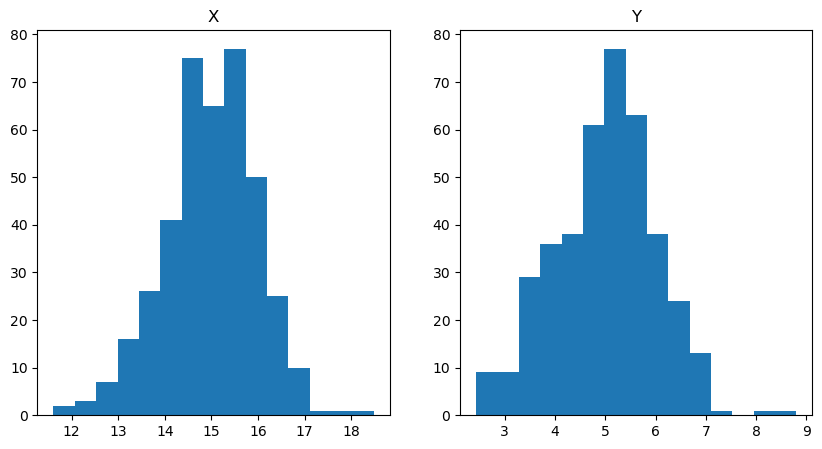

In [2]:

# correlation coefficient r - When we have a r of 1 then we will get a perfectly
# upward sloping line, and if we have a r of -1, we will get
# a perfectly downward slopping line. A r of 0 will
# get us a 'cloud' of points. Here we will consider r=0.90, but you can try other values too.

# Simulate data to plot
r = 0.90
mean = [15, 5]
cov = [[1, r], [r, 1]]
x, y = x, y = np.random.multivariate_normal(mean, cov, 400).T

# Adjust the figure size
plt.figure(figsize=(10,5))

# Plot the histograms of X and Y
plt.subplot(1,2,1)
plt.hist(x = x, bins = 15)
plt.title("X")
plt.subplot(1,2,2)
plt.hist(x = y, bins = 15)
plt.title("Y")
plt.show()

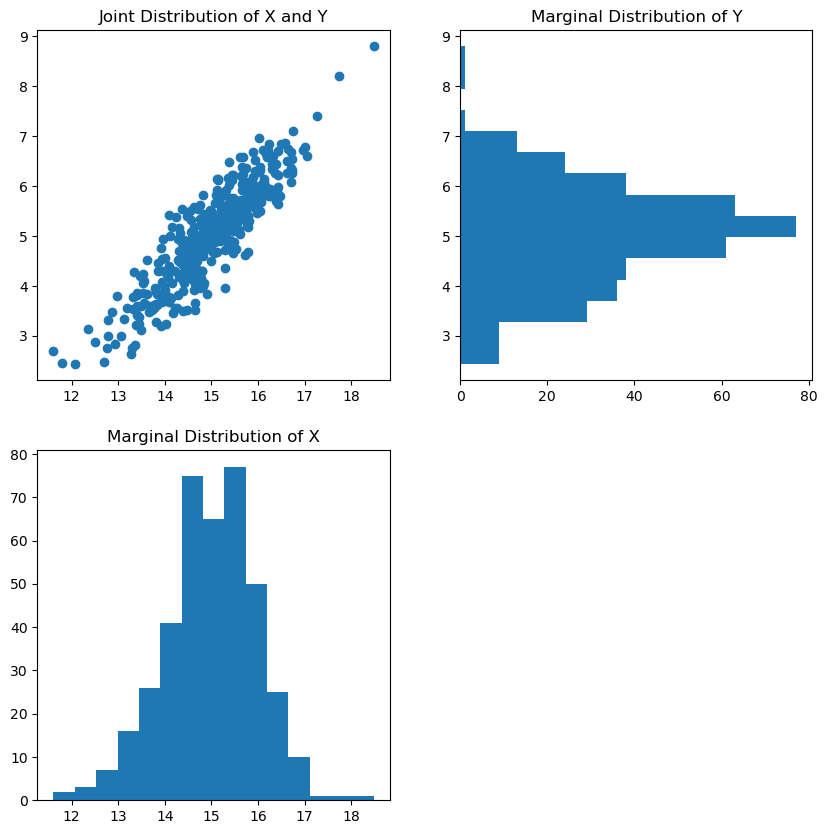

In [3]:
# Plot the data (bivariate joint distributions must necessarily be visualized in a 2D or 3D axis system)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x = x, y = y)
plt.title("Joint Distribution of X and Y")
# Plot the Marginal X Distribution
plt.subplot(2,2,3)
plt.hist(x = x, bins = 15)
plt.title("Marginal Distribution of X")
# Plot the Marginal Y Distribution
plt.subplot(2,2,2)
plt.hist(x = y, orientation = "horizontal", bins = 15)
plt.title("Marginal Distribution of Y")

plt.show()


#### 2D visualization of bivariate normal distribution

c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


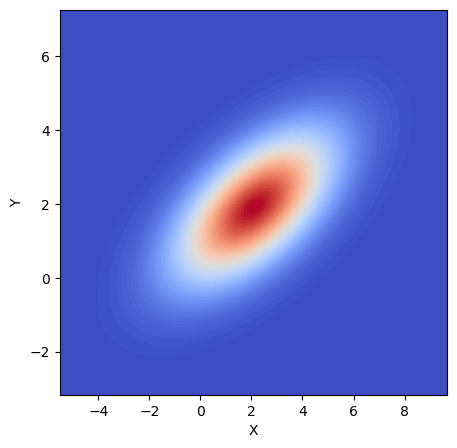

In [4]:
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.stats import multivariate_normal

plt.subplots(figsize=(5, 5)) # define figure size

mu = np.array([2.1, 1.9]) # mean of x and y
sdx = 0.6 # standard deviation of x
sdy = 0.4 # standard deviation of y
r = 0.6 # correlation
cov = np.array([[sdx**2, sdx*sdy*r],[sdy*sdx*r, sdy**2]]) # covariance matrix
rv = np.random.multivariate_normal(mu, cov, 1000) # produce a multivariate random variable (array of 2 random variables)
da = pd.DataFrame(rv) # convert the array to dataframe (1000x2 table)
da.rename({0: 'X', 1: 'Y'}, axis=1, inplace=True)

sns.kdeplot(x=da['X'], y=da['Y'], fill=True, cmap=cm.coolwarm, bw_adjust=10, levels=100, thresh=0)
plt.show()

#### 3D visualization of bivariate normal distribution

In [5]:
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.stats import multivariate_normal

# Simulate data
mu = np.array([2.1, 1.9]) # mean of x and y
sdx = 0.6 # standard deviation of x
sdy = 0.4 # standard deviation of y
r = 0.6 # correlation
cov = np.array([[sdx**2, sdx*sdy*r],[sdy*sdx*r, sdy**2]]) # covariance matrix
rv = multivariate_normal(mu, cov) # produce a multivariate random variable

x = np.linspace(0, 4, num=300) # linspace - Return evenly spaced numbers over a specified interval (num=Number of samples to generate)
y = np.linspace(0, 4, num=300)
X, Y = np.meshgrid(x, y) # Return coordinate matrices from coordinate vectors.
pos = np.dstack((X, Y)) # Stack array

Z = rv.pdf(pos) # Probability density function applied to the stacked array

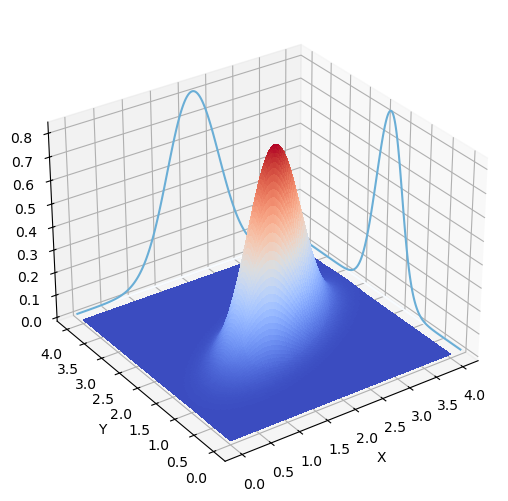

In [6]:
# Produce 3D plot (uncheck some lines of code with "#"" to understand what they do)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # 111 means 1x1 grid, first subplot, projection is defined as 3D
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=cm.coolwarm, antialiased=False ) # antialiased - removes grid from surface; The rstride and cstride kwargs set the stride used to sample the input data to generate the graph
ax.view_init(30, -125) # change the angles (vertical, horizontal)

cset = ax.contour(X, Y, Z, zdir='x', levels=1, offset=4.2, cmap='Blues') # contor line in x with 1 level
cset = ax.contour(X, Y, Z, zdir='y', levels=1, offset=4.2, cmap='Blues') # contor line in y with 1 level

#draw filled probability density function
#cset = ax.contourf(X, Y, Z, zdir='x', levels=1, alpha=0.3, offset=4.2, cmap='Blues')
#cset = ax.contourf(X, Y, Z, zdir='y', levels=1, alpha=0.3, offset=4.2, cmap='Blues')

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### 2. Run correlation analysis

Correlation analysis is a very common procedure in exploratory data analysis to explore relationships between variables in a dataset. Although correlation does not imply causation, causation most often imply correlation. Hence, complemented with regression-based methods, they are important basis to establish hypothesis to be tested with further confirmatory statistics.

#### Example with the [penguin](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data) dataset

The penguin dataset provides biometric data for 3 species of penguins from the Palmer Archipelago (Antarctica). The more relevant variables are:

* Species: penguin species (Chinstrap, Adélie, or Gentoo)
* Island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* Culmen Length (mm) - length of "the upper ridge of a bird's beak"
* Culmen Depth (mm) - depth of "the upper ridge of a bird's beak"
* Flipper Length (mm) - length of the flippers (penguin's wings)
* Body mass (g)
* Sex: penguin sex

![Alt text](https://storopoli.io/Estatistica/5-Correlacoes_files/figure-html5/fig-palmer-penguins-1.png)

In [7]:
data = pd.read_csv('penguins_lter.csv')
data.drop(data.iloc[:,14:18], axis=1, inplace=True)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            334 non-null    object 
 1   Sample Number        334 non-null    int64  
 2   Species              334 non-null    object 
 3   Region               334 non-null    object 
 4   Island               334 non-null    object 
 5   Stage                334 non-null    object 
 6   Individual ID        334 non-null    object 
 7   Clutch Completion    334 non-null    object 
 8   Date Egg             334 non-null    object 
 9   Culmen Length (mm)   334 non-null    float64
 10  Culmen Depth (mm)    334 non-null    float64
 11  Flipper Length (mm)  334 non-null    float64
 12  Body Mass (g)        334 non-null    float64
 13  Sex                  334 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 39.1+ KB


##### Test correlation between flipper length and body mass of *penguins* individuals and compare results with rank correlation approaches

In [8]:
# test Pearson's correlation between flipper length and body mass
stat, p = stats.pearsonr(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"])
print('r=%.3f, p-value=%.3f' % (stat, p))

r=0.873, p-value=0.000


In [9]:
# test Spearman's Rank Correlation between flipper length and body mass
stat, p = stats.spearmanr(a=data["Flipper Length (mm)"], b=data["Body Mass (g)"])
print('r=%.3f, p-value=%.3f' % (stat, p))

r=0.841, p-value=0.000


In [10]:
# test Kendall’s Rank Correlation between flipper length and body mass
stat, p = stats.kendalltau(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"])
print('r=%.3f, p-value=%.3f' % (stat, p))

r=0.662, p-value=0.000


#### Visualizing correlation

The most obvious form of visualizing correlations is using a scatterplot. However, matplotlib, seaborn and other python modules provide easy ways of producing other more informative and appealing visualizations.

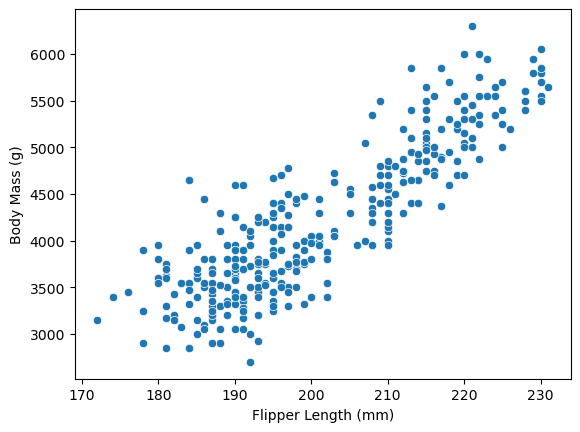

In [11]:
# Scatter plots
sns.scatterplot(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"])
plt.show()

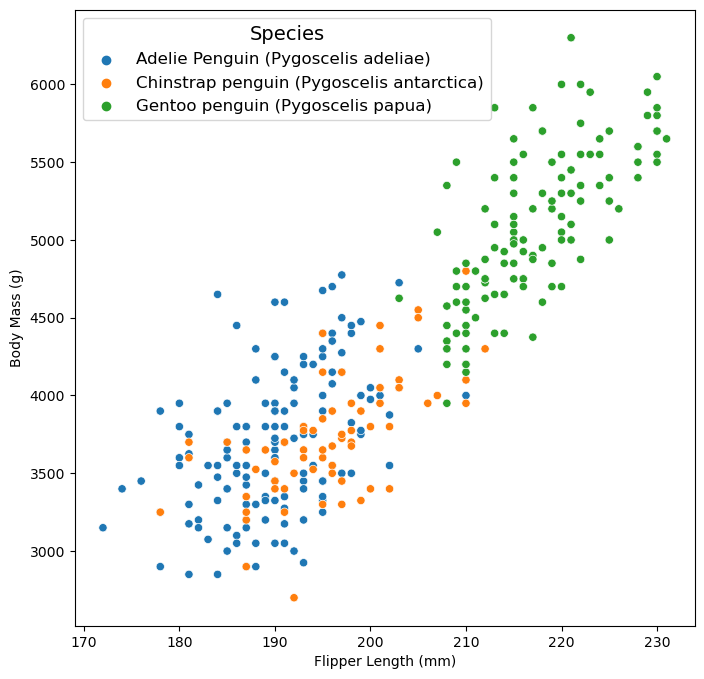

In [12]:
# Scatter plots with group defined by Species
plt.subplots(figsize=(8, 8))
sns.scatterplot(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"], hue = data['Species']);
plt.legend(title='Species', fontsize='12', title_fontsize='14')
# plt.legend(bbox_to_anchor=(1.02, 1), title='Species', fontsize='12', title_fontsize='14') # to place the legend outside the plot area
plt.show()

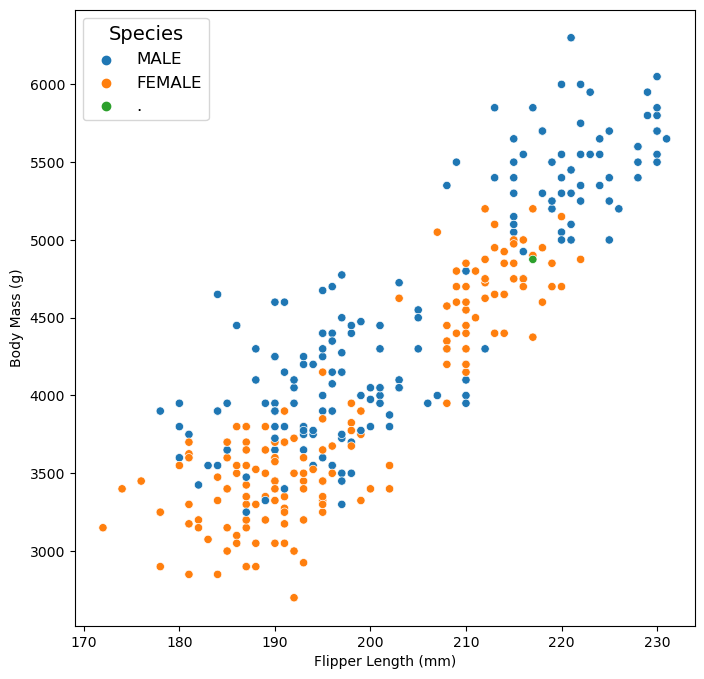

In [13]:
# Scatter plots with group defined by Sex
plt.subplots(figsize=(8, 8))
sns.scatterplot(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"], hue = data['Sex']);
plt.legend(title='Species', fontsize='12', title_fontsize='14')
# plt.legend(bbox_to_anchor=(1.02, 1), title='Species', fontsize='12', title_fontsize='14') # to place the legend outside the plot area
plt.show()

c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


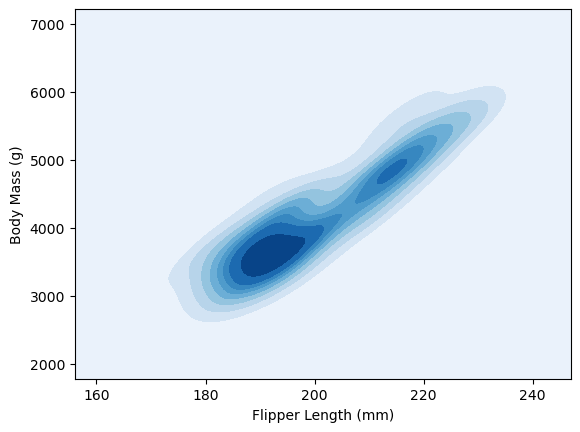

In [14]:
# Kernel density plots
sns.kdeplot(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"], cmap="Blues", fill=True, thresh=0);

c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


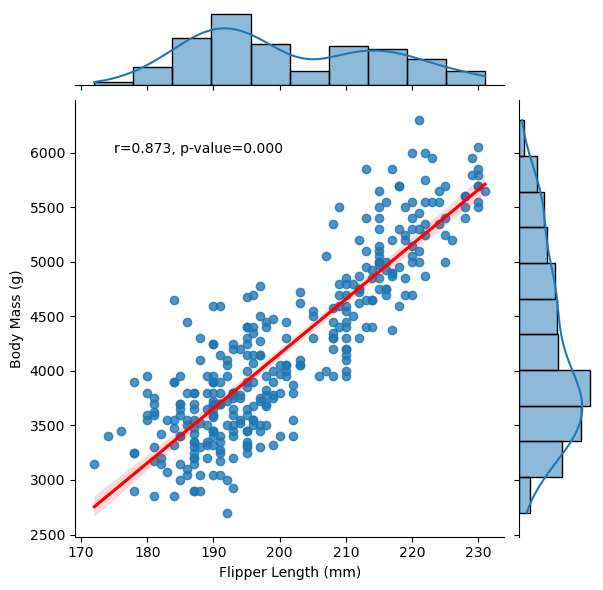

In [15]:
# Composed plots with scatterplot and histograms
stat, p = stats.pearsonr(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"])

g=sns.jointplot(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"], kind='reg', data=data, joint_kws={'line_kws':{'color':'red'}})
g.ax_joint.text(x=175, y=6000, s=('r=%.3f, p-value=%.3f' % (stat, p))); # to show results from the correlation test

c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

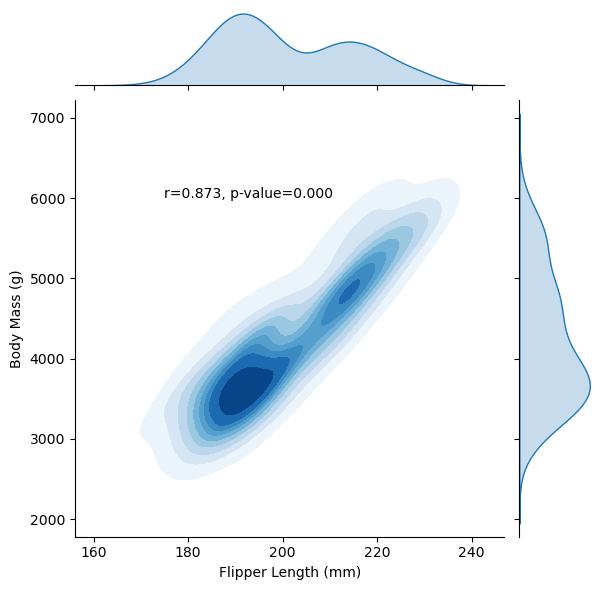

In [16]:
# Composed Kernel density plots
stat, p = stats.pearsonr(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"])

g=sns.jointplot(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"], kind='kde', data=data, fill=True, cmap="Blues")
g.ax_joint.text(x=175, y=6000, s=('r=%.3f, p-value=%.3f' % (stat, p)))
plt.show()

c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

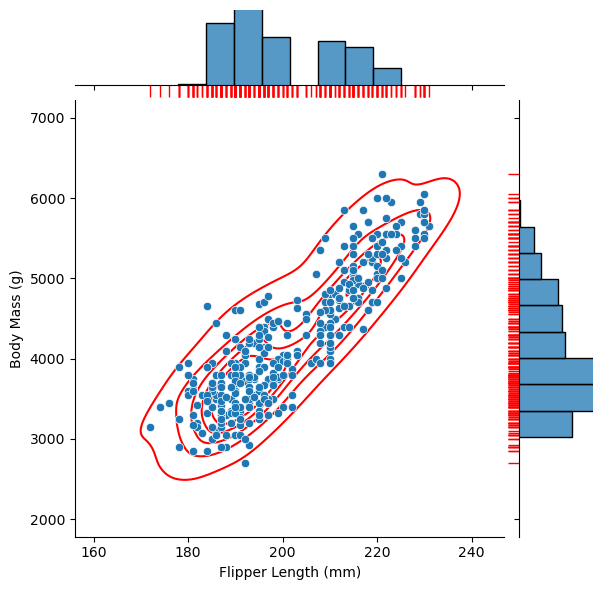

In [17]:
# Scatterplot with histograms and Kernel Density

g=sns.jointplot(x=data["Flipper Length (mm)"], y=data["Body Mass (g)"], data=data)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
plt.show()

### 3. Correlation matrices

Correlation matrices is an important output of multivariate exploratory data analysis. It is also the basis of multivariate Ordination techniques such as Principal Components Analysis. It provides an important overview of wich variables in our dataset are more related with each other. Multicolinearity is a major issue for regression-based as well as other modelling approaches, including machine learning. The graphical analysis of multicolinearity is an essential step to select predictor variables for modelling purposes.

Different visualizations are more or less adequate depending on the purposes as well as the number of targeted variables of correlation analysis.

In [18]:
list(data.columns)

['studyName',
 'Sample Number',
 'Species',
 'Region',
 'Island',
 'Stage',
 'Individual ID',
 'Clutch Completion',
 'Date Egg',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Sex']

c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

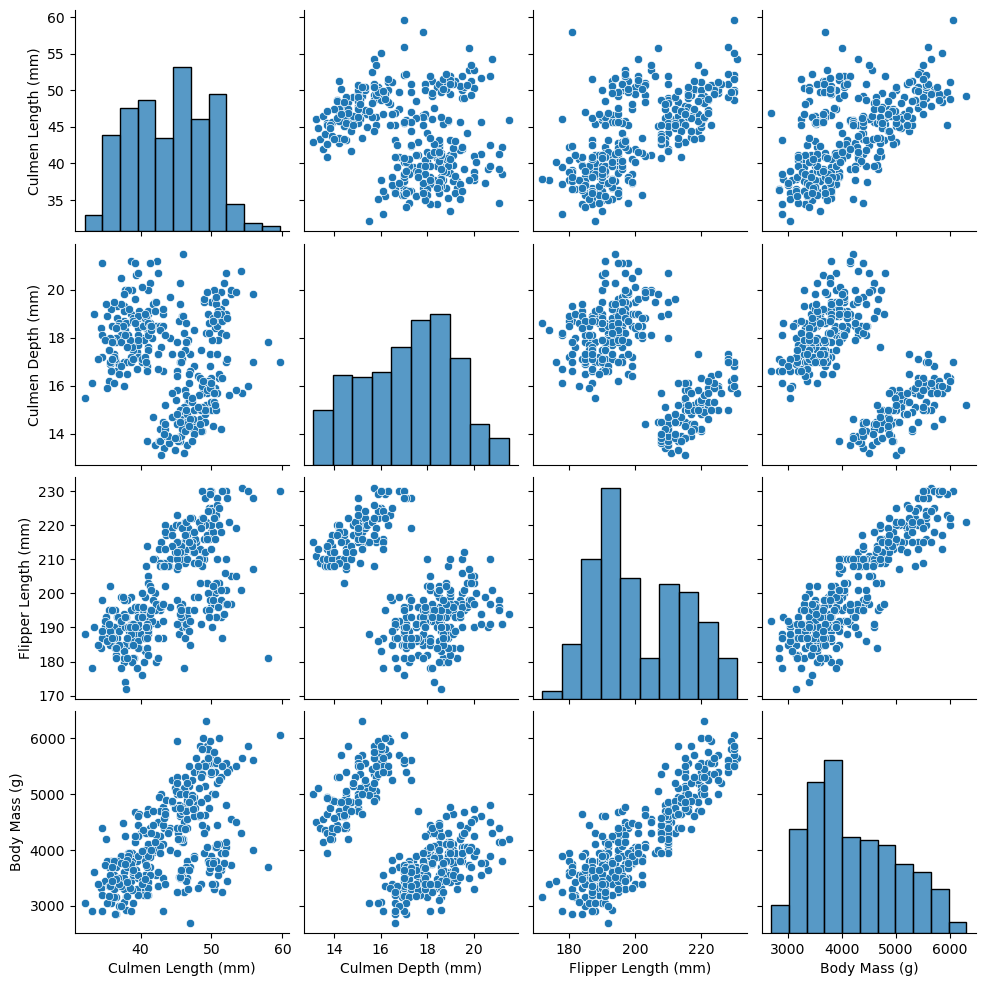

In [19]:
# Scatterplots and histograms
import seaborn as sns
data_sel = data.iloc[:,[2,9,10,11,12,13]]
sns.pairplot(data_sel);

c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jesus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

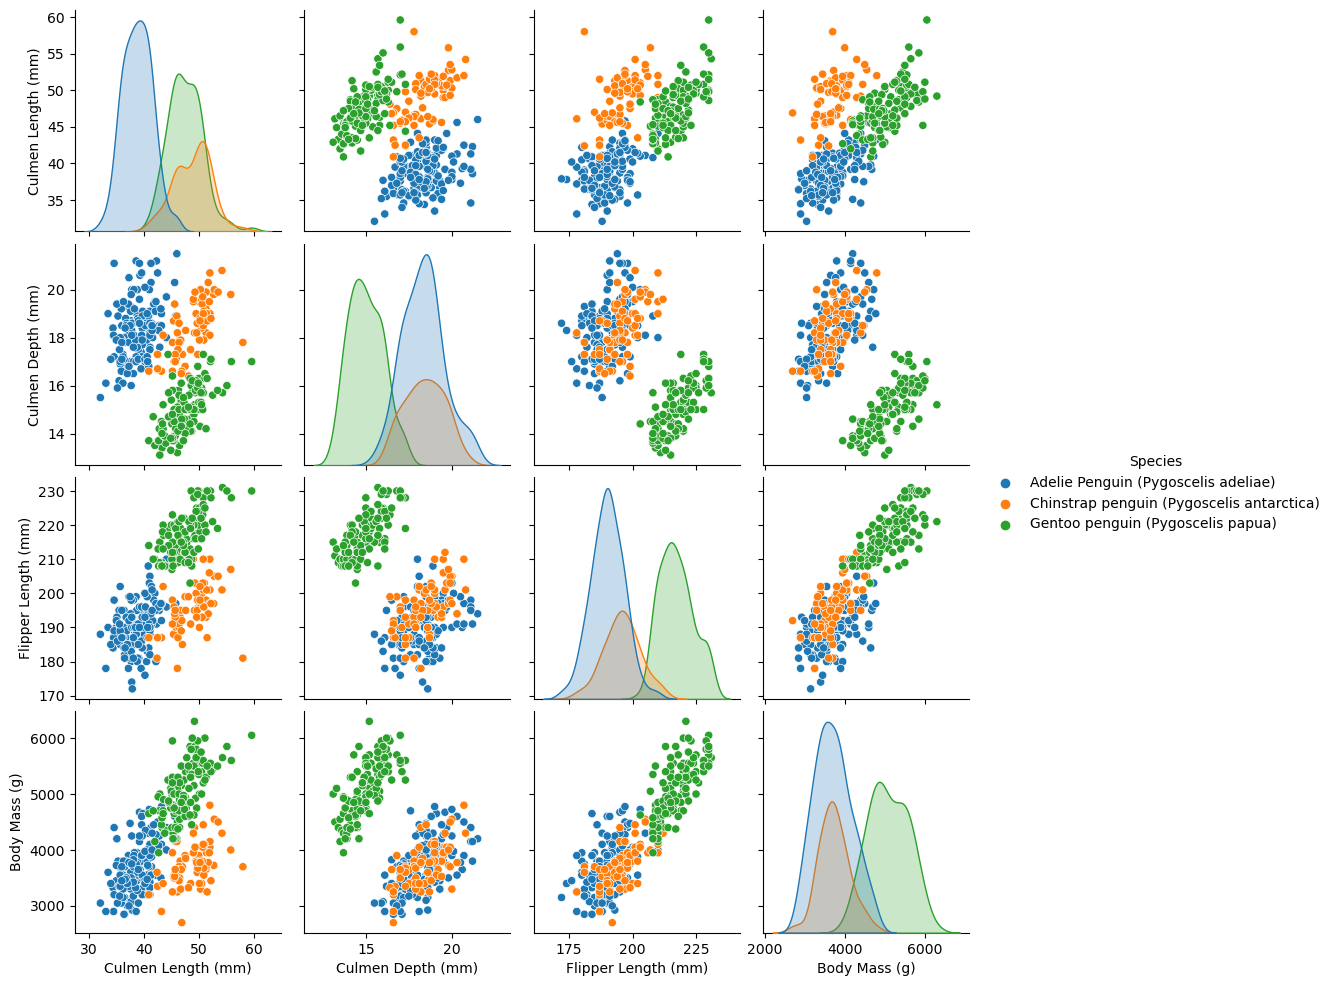

In [20]:
# Scatterplots and KDE - categorized by "species"
import seaborn as sns
sns.pairplot(data_sel, hue='Species');

ValueError: could not convert string to float: 'Adelie Penguin (Pygoscelis adeliae)'

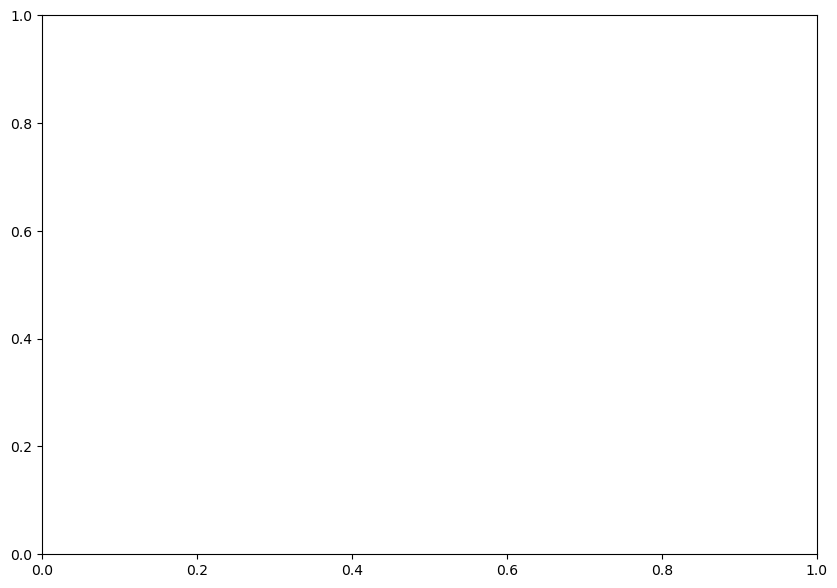

In [21]:
# correlation map or heatplot
f,ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data_sel.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax, cmap='coolwarm_r'); # '_r' after the palette name reverse the color order of the palette

In [ ]:
# Composite plot mixing scatterplots and univariate/bivariate Kernel Density Estimates

plt.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data_sel, diag_sharey=False)
axes = g.axes
g.map_upper(plt.scatter,  linewidths=1, 
            edgecolor="w", s=90, alpha = 0.5)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
plt.show()

In [ ]:
# Composite plot mixing scatterplots, smoothed lines, histograms and tabular charts (R-style)

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 60 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=50)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(data_sel, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.histplot,
           kde=True,
           color = 'red',
           edgecolor = 'k',
           facecolor = 'lightgrey')
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), data_sel.columns):
    ax.set_title(col, y=0.85, fontsize=22)

In [ ]:
# Same thing but more appealling and adding bubble charts

import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(data_sel, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot);

In [ ]:
# A tabular chart with correlation values, the overall shape of the relationship, emphasized with a color gradient

from biokit import Corrplot # 
corr = data_sel.corr(method='spearman')
c = Corrplot(corr)
c.plot(method='ellipse', grid=True, shrink=1, rotation=45, upper='text', lower='ellipse')
fig = plt.gcf()
fig.set_size_inches(10, 8)